In [4]:
%matplotlib inline
import os
import numpy as np

In [89]:
NUM_ACTIONS = 3


regret_sum = np.zeros(NUM_ACTIONS, np.float64)
strategy = np.zeros(NUM_ACTIONS, np.float64)
strategy_sum = np.zeros(NUM_ACTIONS, np.float64)
opp_strategy = np.array([0.4, 0.3, 0.3])


In [90]:
def get_strategy():
    global regret_sum, strategy_sum
    norm_sum = 0
    strategy = np.maximum(regret_sum, 0)
    norm_sum = np.sum(strategy)
    if norm_sum > 0:
        strategy /= norm_sum
    else:
        strategy = np.ones(NUM_ACTIONS) / NUM_ACTIONS
    strategy_sum += strategy
    return strategy
    


In [91]:
get_strategy()

array([0.33333333, 0.33333333, 0.33333333])

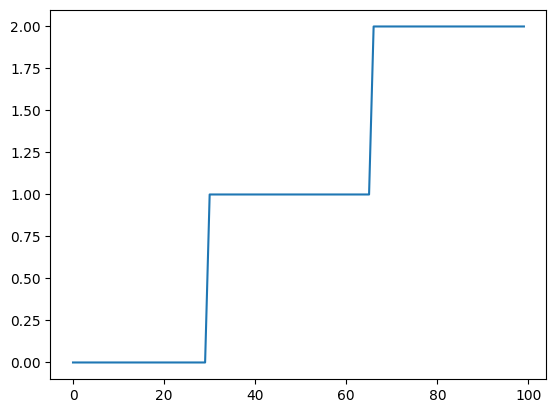

In [93]:
import random
def get_action(strategy):
    r = random.random()
    rr = np.random.uniform()
    #print(r)
    #strategy / np.sum(strategy)
    return np.searchsorted(np.cumsum(strategy) , r)

a = [get_action(get_strategy()) for i in range(100)]
plot(sorted(a))

In [110]:

def train(epochs):
    global regret_sum, strategy_sum
    uu = 0
    action_utility = np.zeros(NUM_ACTIONS)
    for i in range(epochs):
        strategy = get_strategy()
        strategy_sum += strategy
        my_action = get_action(strategy)
        other_action = get_action(opp_strategy)
        action_utility[other_action] = 0
        action_utility[(other_action + 1) % NUM_ACTIONS] = 1
        action_utility[(other_action - 1) % NUM_ACTIONS] = -1
        regret_sum += action_utility - action_utility[my_action]
    return strategy_sum
        

def get_average_strategy():
    global regret_sum, strategy_sum
    avg_strat = np.array(NUM_ACTIONS, np.float64)
    normsum = np.sum(strategy_sum)
    if normsum > 0:
        avg_strat = strategy_sum / normsum
    else:
        avg_strat = 1.0 * np.ones(NUM_ACTIONS) / NUM_ACTIONS
    return avg_strat


strategy_sum = train(100000)


In [113]:
np.set_printoptions(suppress=True)

get_average_strategy()

array([0.0001016 , 0.99980334, 0.00009506])

([<matplotlib.lines.Line2D at 0x7fce0cc688b0>], 10.725)

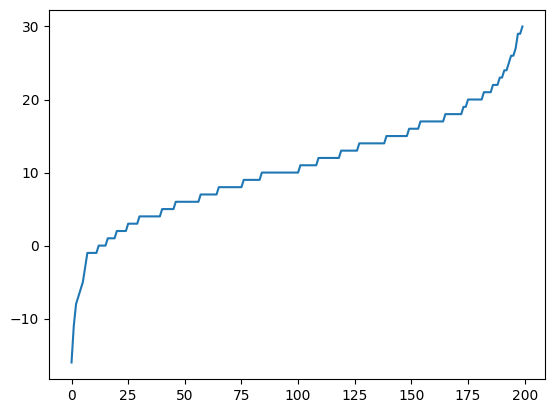

In [117]:
def utility(p1, p2):
    if p1 == p2:
        return 0
    elif p1 == 2 and p2 == 1:
        return 1
    elif p1 == 0 and p2 == 2:
        return 1
    elif p1 == 1 and p2 == 0:
        return 1
    else: 
        return -1
    

uuu = []
for j in range(200):
    uu = 0
    for i in range(100):
        strategy = get_average_strategy()
        #strategy = np.array([0,1,0])
        my_action = get_action(strategy)
        other_action = get_action(opp_strategy)
        uu += utility(my_action, other_action)
    uuu.append(uu)
plot(sorted(uuu)), np.mean(uuu)





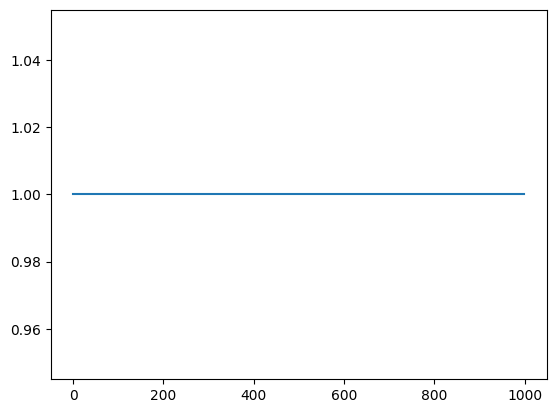

In [119]:
a = [get_action(get_average_strategy()) for _ in range(1000)]
plot(sorted(a))